<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Housing (2).csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 20)

Column: mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64
--------------------
Column: guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64
--------------------
Column: basement
basement
no     354
yes    191
Name: count, dtype: int64
--------------------
Column: hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
--------------------
Column: airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64
--------------------
Column: prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64
--------------------
Column: furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
--------------------


In [ ]:
binary_map = {'yes': 1, 'no': 0}
df['mainroad'] = df['mainroad'].map(binary_map)
df['guestroom'] = df['guestroom'].map(binary_map)
df['basement'] = df['basement'].map(binary_map)
df['hotwaterheating'] = df['hotwaterheating'].map(binary_map)
df['airconditioning'] = df['airconditioning'].map(binary_map)
df['prefarea'] = df['prefarea'].map(binary_map)

furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
display(df.head())
df.info()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


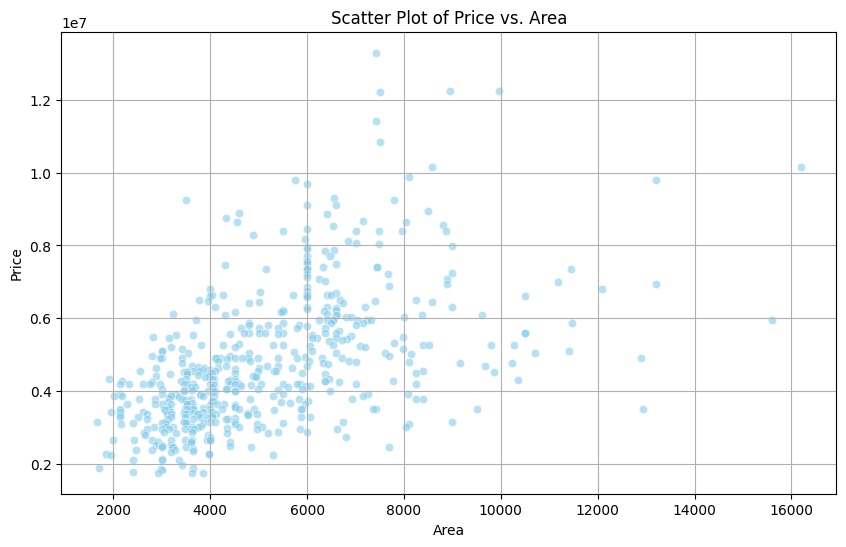

In [ ]:
# Scatter Plot: price vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', alpha=0.6, color='skyblue')
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

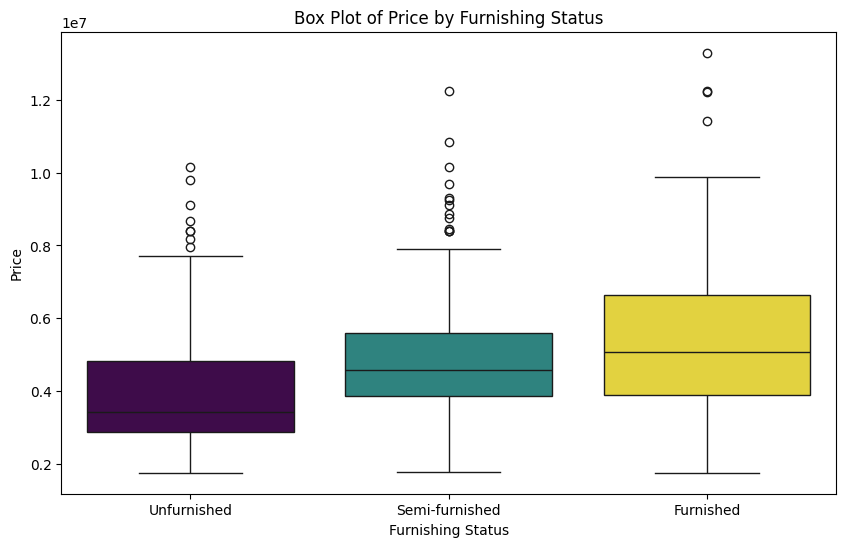

In [ ]:
# Box Plot: price by furnishingstatus
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='furnishingstatus', y='price', palette='viridis', hue='furnishingstatus', legend=False)
plt.title('Box Plot of Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1, 2], labels=['Unfurnished', 'Semi-furnished', 'Furnished'])
plt.show()

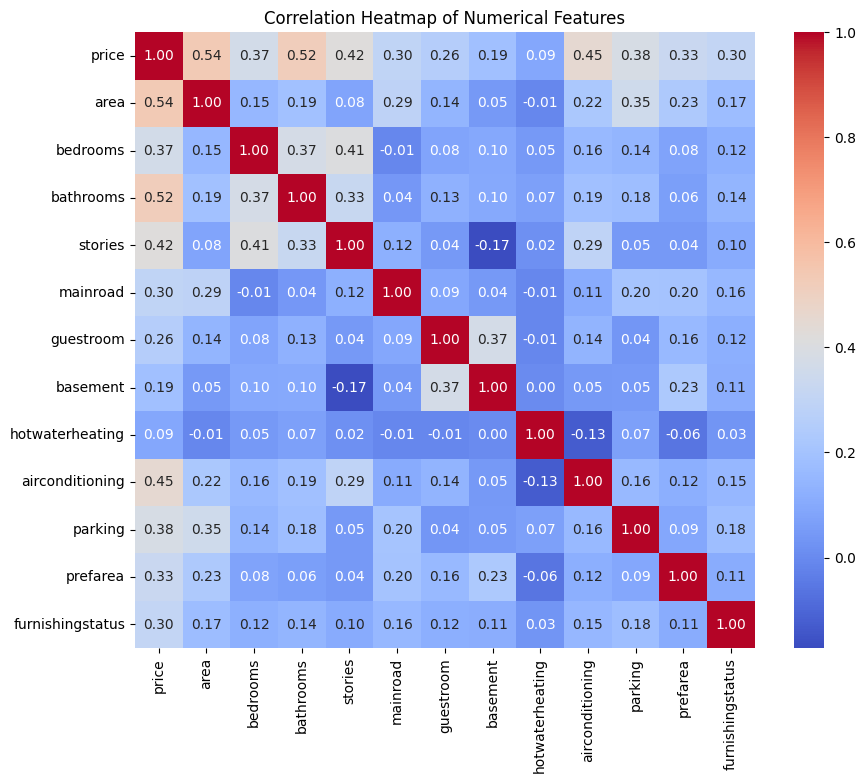

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

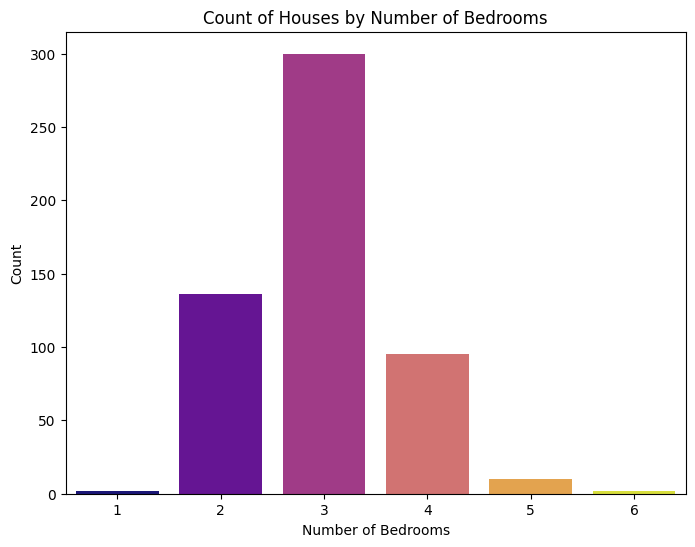

In [ ]:
# Bar Plot: Count of houses by number of bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bedrooms', palette='plasma', hue='bedrooms', legend=False)
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 12)
Shape of X_test: (109, 12)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.6494754192267803


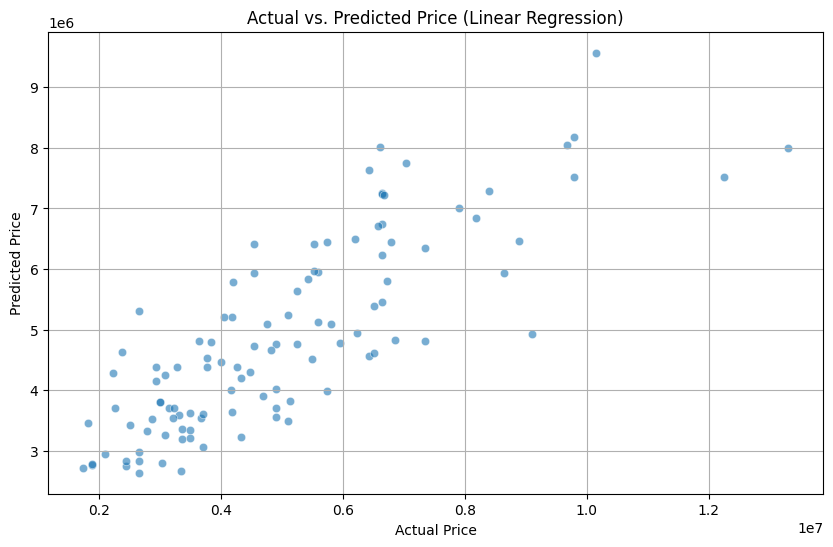

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price (Linear Regression)")
plt.grid(True)
plt.show()